# Задание: Центральная предельная теорема своими руками

## Гистограмма выборки и теоретическая плотность распределения

Рассмотрим *распределение Гомпертца* для случайной величины.

Плотность вероятности для распределения Гомпертца будет иметь следующий вид:

$
f(x, c) = c \cdot exp(x) \cdot exp(-c(e^x - 1)),
$

для x >= 0, c > 0.

Сгенерируем из него выборку объёма 1000 и сравним гистограмму выборки и с теоретической плотностью распределения случайной величины. Но сначала подключим необходимые библиотеки.

In [1]:
# импорт необходимых библиотек
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

# вывод графиков в виде изображений непосредственно в ноутбуке
%matplotlib inline

In [2]:
# генерация выборки из распределения (объем выборки - 1000)
c = 0.947                      # значение взято из примера в документации 
                               # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gompertz.html#scipy.stats.gompertz
pr_distr = sts.gompertz(c)
sample = pr_distr.rvs(1000)    # rvs - random variates

# теоритеческая плотность вероятности для распределения
x = np.linspace(0,15,1000)
pdf = pr_distr.pdf(x)          # pdf - probability density function

Text(0, 0.5, '$f(x)$')

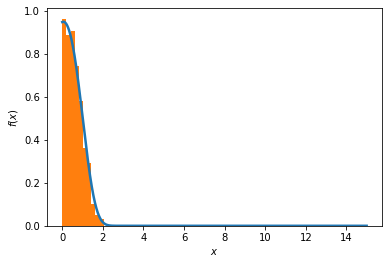

In [3]:
# построение гистограммы выборки с наложением на нее 
# теоретической оценки плотности вероятности экспоненциального распределения
plt.plot(x, pdf, linewidth = 2.5)
plt.hist(sample, density = True) # в задании сказано указать normed=True для гистограммы, 
                                 # однако в новой версии matplotlib этот параметр переименован в density
plt.xlabel('$x$')
plt.ylabel('$f(x)$')

**Вывод**: из графика видно, что гистограмма выборки совпадает с теоретической оценкой плотности вероятности распределения Гомпертца.

## Распределение выборочных средних
Проведем оценку распределения выборочного среднего случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (5, 10, 50) сгенерируем 1000 выборок объёма n и построим гистограммы распределений их выборочных средних. 

В соответствии с Центральной предельной теоремой выборочное среднее для n величин определяется выражением:

$\bar{X}_n = \frac{1}{n} \sum\limits_{i=1}^n X_i$

и приближается нормальным распределением  $N(\mu = \mathbb{E}X, \sigma^2 = \frac{\mathbb{D}X}{n}),$ где $n$ - объем выборки, $\mathbb{E}X$ и $\mathbb{D}X$ соответственно математическое ожидание и дисперсия рассматриваемого распределения.

Для распределения Гомпертца: $\mathbb{E}X = p + 1,575s$ - математическое ожидание, $\mathbb{D}X = 12,245s^2$ - дисперсия (значения из литературы). p - характеризует сдвиг графика по оси абсцисс, а s отражает крутизну графика в точке перегиба.

In [4]:
# функция, генерирующая график гистограммы выборочных средних случайной величины
# для объема выборки n и теоретической оценки плотности вероятности для распределения выборочных средних
#import scipy.stats as sts
def generate_pdf(n): 
    # выборочные средние по выборкам объема n
    val = []
    c = 0.947
    for _ in range(1000):
        pr_distr = sts.gompertz(c)
        sample = pr_distr.rvs(n)
        sample_val = np.mean(sample)
        val.append(sample_val)
    
    # теоритеческая плотность вероятности (pdf - probability density function) для нормального распределения
    p = -0.1   # p и s - "коэффициенты формы"
    s = 0.45   # рассчитаны аналитически
    mu = p + 1.575*s # theoretical expectation
    sigma = s*(1./n) ** 0.5 # theoretical sigma
    norm_distr = sts.norm(loc=mu, scale=sigma)
    x = np.linspace(0,4,100)
    pdf = norm_distr.pdf(x)
    
    # построим гистограмму выборочных средних и наложим на нее теоретическую 
    # оценку плотности вероятности нормального распределения
    plt.plot(x, pdf, linewidth = 2.5)
    plt.hist(val, density = True)
    plt.xlabel('$\\bar{X}_n$')
    plt.ylabel('$f(\\bar{X}_n)$')
    plt.title('n = %d' % n)
    plt.show()

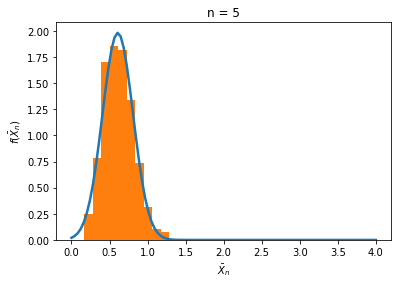

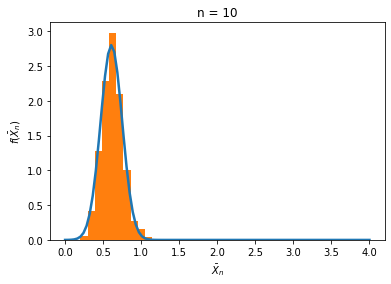

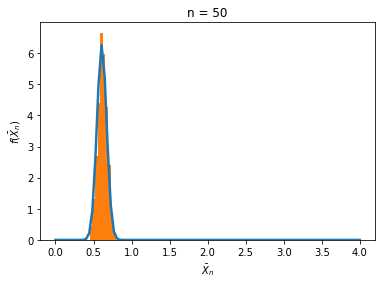

In [5]:
# гистограммы распределений выборочных средних 
# и приближающих их нормальных распределений 
# при различных объемах выборок n
for n in [5, 10, 50]:
    generate_pdf(n)

**Вывод**: как видно из графиков, чем больше объем выборки n, тем лучше распределение выборочных средних соответствует приближающему его нормальному распределению.